<a href="https://colab.research.google.com/github/incerasita/ADA/blob/main/Lecture_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Language Modeling
Language modeling in natural language processing (NLP) plays a pivotal role in the development of intelligent systems that can understand and generate human language. Essentially, a language model aims to predict the likelihood of a sequence of words or the probability of the next word given a specific context. By capturing the underlying structure and patterns in textual data, language models facilitate various NLP tasks, such as machine translation, text summarization, sentiment analysis, and conversational AI.


#Probabilistic Language Modeling with n-grams
Probabilistic language modeling using n-grams is a fundamental approach in NLP that leverages the statistical properties of text to predict word sequences. An n-gram model represents text as contiguous sequences of n words, where the context for predicting the next word is limited to the previous n-1 words. For instance, a bigram (n=2) model restricts the context to a single preceding word, while a trigram (n=3) model considers the two preceding words.
N-gram models estimate the probabilities of word sequences by calculating their frequency in a given corpus. They utilize the Markov assumption, which states that the probability of the next word depends only on the preceding n-1 words, thus simplifying computation.

Despite their simplicity, n-gram models have been widely used in various NLP tasks, such as speech recognition, machine translation, and text generation. However, they have limitations, including data sparsity and the inability to capture long-range dependencies in text. The emergence of more sophisticated techniques like deep learning-based language models has shifted the focus, but n-gram models still hold relevance as a foundation for understanding language modeling and its development.

In this session, we will explore n-grams-based language modeling. We will also explore language modeling using word embeddings.


#Example: A Jane Austin Novel
We will explore ‘next word prediction’ and ‘text generation’ based on the Jane Austin novel ‘Sense and Sensibility’. Let’s look first at all the books that are available.


## View Books and Download

In [1]:
import nltk
nltk.download('gutenberg')  # Make sure the Gutenberg corpus is downloaded
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [2]:
# List available texts in the Gutenberg corpus
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
# Load "Sense and Sensibility" text
sas = gutenberg.raw('austen-sense.txt')

# Print the first 500 characters of "Sense and Sensibility"
print(sas[:500])


[Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settled in Sussex.
Their estate was large, and their residence was at Norland Park,
in the centre of their property, where, for many generations,
they had lived in so respectable a manner as to engage
the general good opinion of their surrounding acquaintance.
The late owner of this estate was a single man, who lived
to a very advanced age, and who for many years of his life,
had a constant companion an


##n-gram Model for Next Word Prediction and Text Generation.

Following are the key steps.

* **Step 1: Preprocess the Text**

Start by tokenizing the text.

* **Step 2: Build the N-gram Model**

Create a trigram model, which will be used for predicting the next word based on the previous two words.

* **Step 3: Next Word Prediction**

Write a function that takes two words as input and predicts the most probable next word.

* **Step 4: Text Generation**

Using the trigram model, generate text by iteratively predicting the next word.

In [4]:
import nltk
from nltk import word_tokenize, ngrams
from collections import defaultdict, Counter
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(sas.lower())  # Convert to lower case

# Generate trigrams from the tokens
trigrams = list(ngrams(tokens, 3))
trigram_freq = defaultdict(Counter)

# Populate the frequencies of trigrams
for w1, w2, w3 in trigrams:
    trigram_freq[(w1, w2)][w3] += 1

# Function to predict the next word
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        # Get the most common next word for the given bigram (w1, w2)
        return trigram_freq[(w1, w2)].most_common(1)[0][0]
    else:
        return None

# Function to generate text
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
trigrams

### Test the Results

In [6]:
# Example usage of the prediction function
print("Next word:", predict_next_word('was', 'the'))

Next word: more


In [8]:
# Example usage of the text generation function
start_words = ("the", "more")
generate_text(start_words, 100)

#you will get the most likely next word and finally it might be repeat
#should not select most one likely word but should be ex. most 20 likely words

"the more easily reconciled , by the entrance of the house , and the two miss steeles , as she had been in the world . '' `` i am sure i would not be in town , and the two miss steeles , as she had been in the world . '' `` i am sure i would not be in town , and the two miss steeles , as she had been in the world . '' `` i am sure i would not be in town , and the two miss steeles , as she had been in the"

### Improving Text Generation
The approach of  picking the most frequent next word in text generation results in text repetition and uninteresting text.

We will modify the `predict_next_word` function to choose the next word based on a probability distribution rather than just picking the most frequent next word. This way, the selection will still favor more likely words but won't always select the same word every time.


In [9]:
import random

# Function to predict the next word with randomness
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        next_words = list(trigram_freq[(w1, w2)].elements())
        return random.choice(next_words) if next_words else None
    else:
        return None

# Function to generate text with randomness
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)



In [10]:
# Example usage of the text generation function
start_words = ("it", "was")
generate_text(start_words, 500)

"it was the good wishes of his frequent attention to self-interest , however , her beloved child , was particularly grateful . she was afraid of giving him the certain consequence of which , i endeavoured , by that time , that willoughby were then situated , could have prevented his putting an end to such a hurry , she never made any bones of hiding in a more amiable , as far as it had not before i have no idea of it . they wanted to hear how often i watched you , perhaps , then , i know nothing of the very few hours spent in sitting shivering over the keys for a while by owning the truth in it , will not suppose that i would not be deceived . '' `` that was most uncommonly shocked , confounded . fortunately for those who had seen so little , or her fortune small , without attending to her . in feeling , -- she had herself been employed in measuring lengths of worsted for her ? '' `` well may it be doubted ; -- that must attend her on the subject had i died , -- to the idea of such a g

# Embeddings
We will use the `gensim` library, which provides straightforward implementations of `word2vec`, to create word embeddings using the CBOW model.

In [11]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize and convert to lower case
tokens = word_tokenize(sas.lower())

# Organize the tokens into sentences, Word2Vec needs data in format of list of lists of tokens
sentences = [tokens[i:i+100] for i in range(0, len(tokens), 100)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Train the CBOW model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # sg=0 specifies CBOW


## Find 'Semantically Close' Words

The `most_simila`r method is a feature of Gensim's Word2Vec implementation and is commonly used in natural language processing to find words that are most similar to a given word or set of words based on word embeddings. The method essentially calculates the cosine similarity between the specified word(s) and all other words in the model's vocabulary.

Understanding Cosine Similarity

Cosine similarity measures the cosine of the angle between two vectors. In the context of word embeddings, it is a measure of the similarity between two words. The cosine similarity between two vectors
$u$ and $v$ is defined as:

\
$$
similarity = \cos(\theta) = \frac{u \cdot v}{\|u\| \|v\|}
$$


where $u \cdot v$  is the dot product of the vectors and $\|u\|$  and $\|v\|$ are the norms (or magnitudes) of the vectors.


Steps Performed by `most_similar`

* Vector Retrieval: First, the method retrieves the vector(s) for the input word(s). If multiple words are provided, it typically averages their vectors to create a single query vector.

* Similarity Calculation: The method then calculates the cosine similarity between this query vector and all other vectors in the trained model (i.e., the embeddings of all words in the vocabulary).

* Sorting: The cosine similarities are sorted in descending order.

* Top N Results: Finally, the method returns the top N words with the highest cosine similarities.

Optional Parameters

* Positive and Negative Words: The method allows for both positive and negative words. Positive words contribute positively towards the similarity, while negative words contribute negatively. This is useful for analogy tasks (e.g., "king" - "man" + "woman" = "queen").

* Top N: You can specify how many of the most similar words to retrieve.

In [13]:
def find_closest_words(input_word, topn=10):
    if input_word in model.wv.key_to_index:
        # Find the topn most similar words
        similar_words = model.wv.most_similar(positive=[input_word], topn=topn)
        return similar_words  # This returns a list of tuples (word, similarity)
    else:
        return f"The word '{input_word}' is not in the vocabulary."

In [15]:
# Example usage of the function
find_closest_words("family", 10)
#what word is closest to 'family'

[('mind', 0.999553918838501),
 ('most', 0.9993487000465393),
 ('up', 0.9992637634277344),
 ('another', 0.9992208480834961),
 ('pleasure', 0.9991967678070068),
 ('country', 0.9991472363471985),
 ('having', 0.9991359114646912),
 ('determined', 0.9991046190261841),
 ('those', 0.9990919828414917),
 ('want', 0.9990607500076294)]

### 2-D Plot

Steps:
* Retrieve Closest Words: Get the 20 closest words to the input word using the most_similar method.

* Extract Embeddings: Extract the embedding vectors for these words.

* Apply t-SNE: Use t-SNE to reduce the dimensionality of these vectors to two dimensions. Dimensionality reduction techniques such as t-SNE (t-Distributed Stochastic Neighbor Embedding) or PCA (Principal Component Analysis) can be used. We will use t-SNE here because it is particularly well-suited for visualizing high-dimensional data in two or three dimensions.

* Plotting: Plot the resulting two-dimensional points using matplotlib.

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_closest_words(model, input_word, topn=20):
    if input_word not in model.wv.key_to_index:
        print(f"The word '{input_word}' is not in the vocabulary.")
        return

    # Get the closest words specified by 'topn'
    closest_words = model.wv.most_similar(positive=[input_word], topn=topn)
    words = [word for word, _ in closest_words]
    words.append(input_word)  # Also include the input word

    # Extract the corresponding vectors
    word_vectors = np.array([model.wv[word] for word in words])

    # Use t-SNE to reduce dimensionality
    perplexity_value = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    Y = tsne.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(12, 12))
    plt.scatter(Y[:, 0], Y[:, 1], color='blue')

    for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, -5),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.show()


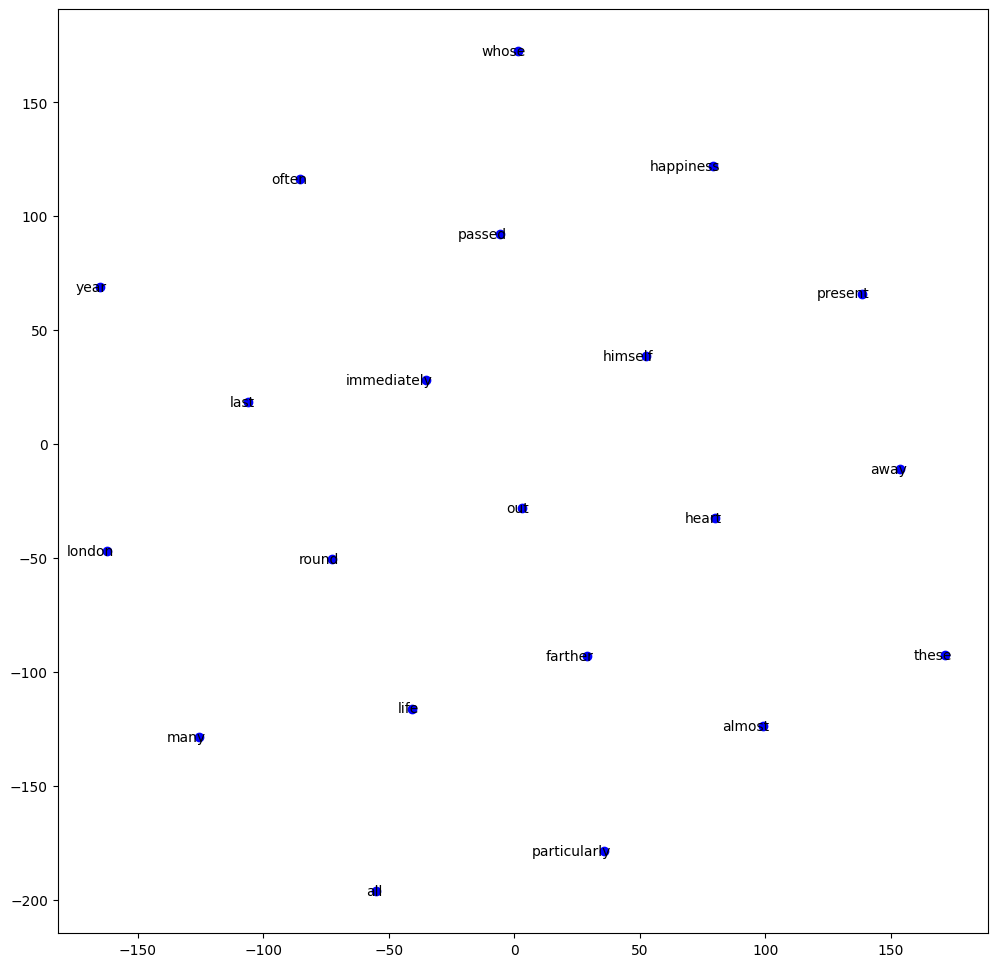

In [17]:
# Example usage of the function
plot_closest_words(model, "life", topn=20)

###3-D Plot

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This is needed for 3D plotting
from sklearn.manifold import TSNE
import numpy as np

def plot_closest_words_3d(model, input_word, topn=100):
    if input_word not in model.wv.key_to_index:
        print(f"The word '{input_word}' is not in the vocabulary.")
        return

    # Get the closest words specified by 'topn'
    closest_words = model.wv.most_similar(positive=[input_word], topn=topn)
    words = [word for word, _ in closest_words]
    words.append(input_word)  # Also include the input word

    # Extract the corresponding vectors
    word_vectors = np.array([model.wv[word] for word in words])

    # Use t-SNE to reduce dimensionality to 3D
    perplexity_value = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
    tsne = TSNE(n_components=3, random_state=42, perplexity=perplexity_value)
    Y = tsne.fit_transform(word_vectors)

    # Plotting in 3D
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], color='blue')

    for label, x, y, z in zip(words, Y[:, 0], Y[:, 1], Y[:, 2]):
        ax.text(x, y, z, label, color='red', fontsize=9)

    ax.set_xlabel('t-SNE Axis 1')
    ax.set_ylabel('t-SNE Axis 2')
    ax.set_zlabel('t-SNE Axis 3')
    plt.show()

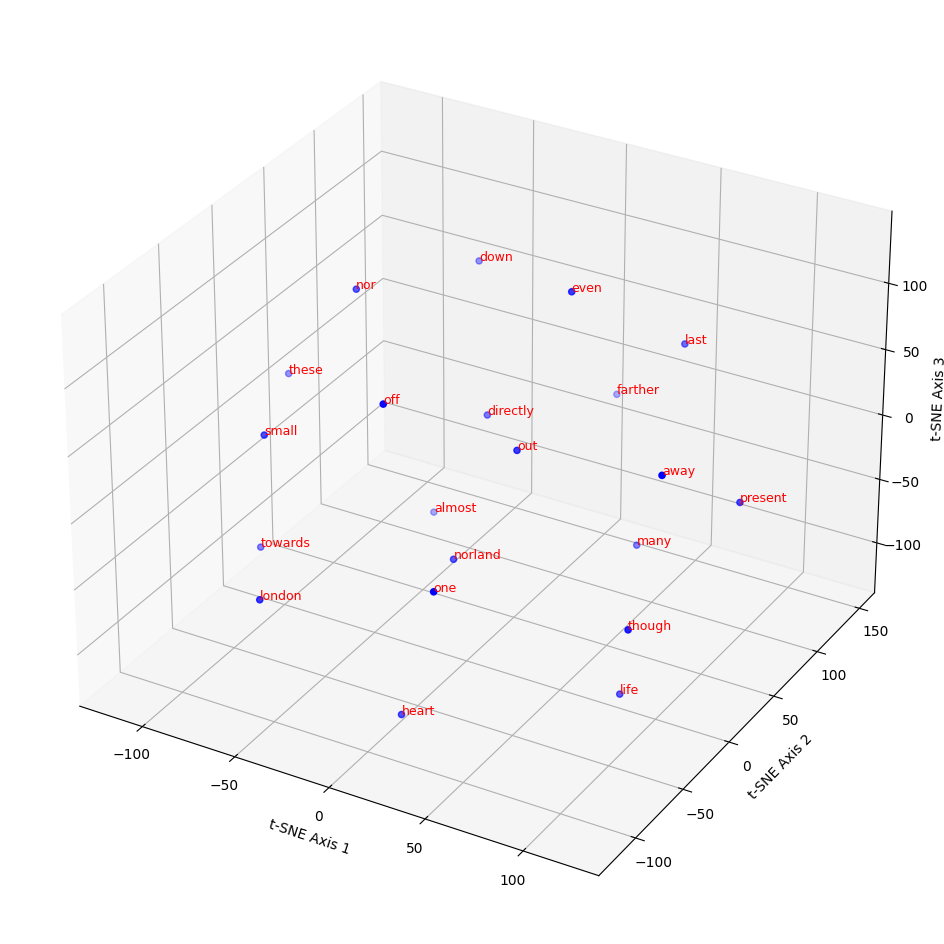

In [19]:
# Example usage of the function
plot_closest_words_3d(model, "present", topn=20)

#Next Word Prediction with Embeddings

As before, we will attempt to use the last two words to predict the next word. But this time we will use the embeddings of the last two words.

##Training Data
Because embeddings are numeric vectors, it allows us to build a prediction model for the next word prediction. We need to prepare the training data for the prediction model. This involves:

1. Creating sequences of embeddings for pairs of words to use as inputs.
2. Using the embedding of the word that immediately follows each pair as the target output.

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a dictionary to map words to their embeddings
word_vectors = {word: model.wv[word] for word in model.wv.index_to_key}

# Preparing the data for next word prediction
X = []
y = []

for sentence in sentences:
    for i in range(len(sentence) - 2):
        if sentence[i] in word_vectors and sentence[i+1] in word_vectors and sentence[i+2] in word_vectors:
            first_word_vec = word_vectors[sentence[i]]
            second_word_vec = word_vectors[sentence[i+1]]
            next_word_vec = word_vectors[sentence[i+2]]
            X.append(np.concatenate([first_word_vec, second_word_vec]))
            y.append(next_word_vec)

X = np.array(X)
y = np.array(y)


##Neural Network Design

We will use the following neural network structure:
1. Input Layer: The input dimension will be twice the `vector_size` of the embeddings (since we concatenate two embeddings).
2. Hidden Layers: One or more dense layers with activation functions like ReLU.
3. Output Layer: The output layer should have as many units as the `vector_size` of the embeddings and could use a linear activation function.
4. Train the Model: The model learns to predict the vector of the next word directly.

In [21]:
# Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_dim=200),  # Assuming vector_size=100
    Dense(100, activation='linear')  # Output dimension same as vector_size
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5
4330/4330 [==============================] - 10s 2ms/step - loss: 0.0668
Epoch 2/5
4330/4330 [==============================] - 8s 2ms/step - loss: 0.0633
Epoch 3/5
4330/4330 [==============================] - 9s 2ms/step - loss: 0.0627
Epoch 4/5
4330/4330 [==============================] - 9s 2ms/step - loss: 0.0623
Epoch 5/5
4330/4330 [==============================] - 9s 2ms/step - loss: 0.0619


##Function to Find Closest Word

We will create a function to find the closest word in the embedding space. This function will compare the predicted embedding to all embeddings in  trained Word2Vec model,  using cosine similarity to determine the closest word.

In [22]:
from scipy.spatial import distance

def closest_word(predicted_embedding, word_vectors):
    min_dist = float('inf')
    closest_word = None
    for word, embedding in word_vectors.items():
        sim = distance.cosine(predicted_embedding, embedding)
        if sim < min_dist:
            min_dist = sim
            closest_word = word
    return closest_word


##Prediction Function
We now create a function that takes the last two words, predicts the next word's embedding using the trained model, and then uses the function above to find the closest actual word.

In [23]:
def predict_next_word(word1, word2, model, word_vectors):
    if word1 not in word_vectors or word2 not in word_vectors:
        return "One of the words is not in the vocabulary."

    # Retrieve the embeddings from word_vectors
    first_word_vec = word_vectors[word1]
    second_word_vec = word_vectors[word2]

    # Combine embeddings and reshape for the model
    combined_embeddings = np.concatenate([first_word_vec, second_word_vec]).reshape(1, -1)

    # Predict the next word's embedding
    predicted_embedding = model.predict(combined_embeddings)

    # Find the closest word in the embedding space
    next_word = closest_word(predicted_embedding.flatten(), word_vectors)
    return next_word


##Predict the Next Word

In [24]:
# Example words
word1 = "he"
word2 = "was"

# Assuming 'model' is your trained Keras model and 'word_vectors' is a dictionary of word embeddings
predicted_word = predict_next_word(word1, word2, model, word_vectors)
print("Predicted next word:", predicted_word)


1/1 [==============================] - 0s 80ms/step
Predicted next word: :


# Text Generation (Deterministic)

In [25]:
def generate_text(start_words, num_words, model, word_vectors):
    generated_words = start_words.split()
    for _ in range(num_words):
        if len(generated_words) < 2:
            break  # If there aren't enough words to predict the next one, stop.
        # Extract the last two words
        last_two_words = generated_words[-2:]
        # Ensure that there are exactly two words passed
        next_word = predict_next_word(last_two_words[0], last_two_words[1], model, word_vectors)
        generated_words.append(next_word)
    return ' '.join(generated_words)


In [26]:
start_words = "sense and"
num_words = 50
# Make sure your 'model' and 'word_vectors' are defined and loaded appropriately.
generated_text = generate_text(start_words, num_words, model, word_vectors)

1/1 [==============================] - 0s 19ms/step


In [27]:
generated_text

'sense and towards came again about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about about'

#Text Generation (Stochastic)

To introduce randomness into the text generation process and avoid generating repetitive text, we will modify how we select the next word after generating its predicted embedding. Rather than always choosing the closest word in terms of embedding distance, will select from the top
𝑁 closest words, weighted by their similarity to the predicted embedding. This approach can lead to more varied and interesting text.

In [28]:
import random

def predict_next_word(word1, word2, model, word_vectors, top_n=20):
    if word1 not in word_vectors or word2 not in word_vectors:
        return "One of the words is not in the vocabulary."

    first_word_vec = word_vectors[word1]
    second_word_vec = word_vectors[word2]
    combined_embeddings = np.concatenate([first_word_vec, second_word_vec]).reshape(1, -1)
    predicted_embedding = model.predict(combined_embeddings).flatten()

    # Get the top N closest words
    top_words, similarities = closest_words(predicted_embedding, word_vectors, top_n)

    # Convert similarities to positive as distances are negative, then to probabilities
    probabilities = np.exp(-similarities)
    probabilities /= probabilities.sum()

    # Randomly select a word based on computed probabilities
    next_word = np.random.choice(top_words, p=probabilities)
    return next_word


In [29]:
from scipy.spatial import distance
import numpy as np

def closest_words(predicted_embedding, word_vectors, top_n=20):
    # Calculate distances and return the top N closest words
    all_words = list(word_vectors.keys())
    all_embeddings = np.array([word_vectors[word] for word in all_words])
    distances = np.array([distance.cosine(predicted_embedding, embedding) for embedding in all_embeddings])
    closest_indices = np.argsort(distances)[:top_n]
    closest_words = [all_words[idx] for idx in closest_indices]
    return closest_words, distances[closest_indices]


In [30]:
def generate_text(start_words, num_words, model, word_vectors, top_n=20):
    generated_words = start_words.split()
    for _ in range(num_words):
        if len(generated_words) < 2:
            break
        last_two_words = generated_words[-2:]
        next_word = predict_next_word(last_two_words[0], last_two_words[1], model, word_vectors, top_n)
        generated_words.append(next_word)
    return ' '.join(generated_words)


In [31]:
start_words = "sense and"
num_words = 50
# Make sure your 'model' and 'word_vectors' are defined and loaded appropriately.
generated_text = generate_text(start_words, num_words, model, word_vectors)

1/1 [==============================] - 0s 19ms/step


In [32]:
generated_text

'sense and open came pretty engaged wished where again just great engagement when just our when saw man leave heart looked about when longer care came again town surprise great engagement where when longer again alone heart again looked saw pretty back where satisfied engaged again felt ) out just alone particularly'

It is important to note that the quality of the generated text depends on the quality of the word embeddings used. The word embeddings in this example were trained on a small dataset using the CBOW word2vec model with a low-dimensional embedding space. As a result, the generated text may not be as coherent as expected.

As the code above illustrates, both next word prediction and text generation tasks are complicated and these algorithms perform rather poorly. This is due to their inability to capture long-range dependencies in text. Large language models (LLMs) can address these limitations, but come at a huge cost in terms of training and computation.


Steps
1. covert text to number
2. embedding (no need to teach for grammar, part of speech ..)
3. next word prediction

# Your turn

1. Create next word prediction and text generation using n-grams based on the novel Moby Dick, by Herman Melville. You can access it with `melville-moby_dick.txt`.
2. Create embeddings based on the file `tinyshakespeare.txt`.Find the closest words to 'king' and plot the results.

In [34]:
mel = gutenberg.raw('melville-moby_dick.txt')
print(mel[:500])

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teac
